In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium  #needed for interactive map
from folium.plugins import HeatMap
from uszipcode import SearchEngine
from uszipcode import Zipcode
search = SearchEngine(simple_zipcode=True)


The first half of our EDA focused on understanding the sheer amount of gun violence deaths and injuries in the U.S. We have 2 main data sets and have derived further findings based on the demographic data we accessed through deeper cleaning. 

**NICS - National Instant Criminal Background Check System |  2013-2021**
    
    We will focus on the top 10 states getting permits and how they compare to the states with the most incidents?

    If states with less NICS have more incidents, we should advocate for more background checks etc.

**GVA - Gun Violence Archive |  2013-2018**
    
    We know the general profile of the most common suspect (Age: 29, Gender: Male) 

    How do we engage the suspect profile nationally to address their impact on the victim profile?


**Our next layer would be mapping death/injury incidents in the top 10 states by zip code** to see which areas need immediate policy shifts and the local representation we could reach out to deliver the info.

### Visuals Needed ###

    Top 10 Nics States - Clean, Color, Relabel | Due by 8/8

    Suspect Profile, Victim Profile - Complete, July
    
    Redo per 100k w/ New Data - Complete, 8/5

    Top 10 Injury States, Top 10 Death States - Clean, Color, Relabel | Due by 8/8

    Top 5 Injury&Death States (10) Zip Code Maps - Goals


In [3]:
og_gva = pd.read_csv("data/GVA Data.csv")
og_gva.head(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
gva_final = pd.read_csv("data/alldata1.csv")
gva_final.head(5)

,Unnamed: 0,date,state,city,n_killed,n_injured,incident_id
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105
1,1,1/1/2013,California,Hawthorne,1,3,460726
2,2,1/1/2013,Ohio,Lorain,1,3,478855
3,3,1/5/2013,Colorado,Aurora,4,0,478925
4,4,1/7/2013,North Carolina,Greensboro,2,2,478959


In [5]:
nics = pd.read_csv("data/nics-firearm-background-checks.csv")
nics.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,0.0,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,0.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,5.0,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,0.0,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,129.0,0.0,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739


In [6]:
demo = pd.read_csv("data/CLEAN_demo.csv")
demo.head(5)

,incident_id,age,age_group,type,gender,status
0,461105,20.0,Adult 18+,Victim,Male,Arrested
1,460726,20.0,Adult 18+,Victim,Male,Killed
2,478855,25.0,Adult 18+,Subject-Suspect,Male,"Injured, Unharmed, Arrested"
3,478925,29.0,Adult 18+,Victim,Female,Killed
4,478959,18.0,Adult 18+,Victim,Female,Injured


### Clean NICS and Visualize Top 10 States ###

In [7]:
nics_copy = nics.copy()
nics_copy["month"]=pd.to_datetime(nics_copy['month'])
nics_copy["year_only"] = pd.to_datetime(nics_copy['month'])
nics_copy["year_only"] = nics_copy['year_only'].dt.strftime('%Y')
nics_copy["year_only"] = nics_copy["year_only"].astype(int)
nics_copy = nics_copy[(nics_copy['year_only'] >= 2013) &
                              (nics_copy['year_only'] <= 2020)]
nics_final = nics_copy.drop(["return_to_seller_other","return_to_seller_long_gun","return_to_seller_handgun",
             "totals", "rentals_handgun","rentals_long_gun",'permit_recheck',"admin",
             'prepawn_handgun', 'prepawn_long_gun','prepawn_other','returned_handgun',
                         'returned_long_gun','returned_other'], axis=1)
nics_final["total"]= nics_final.loc[:,['permit', 'handgun', 'long_gun',
       'other', 'multiple', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other']].sum(axis=1)
nics_final.head(5)

,month,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total
275,2020-12-01,Alabama,33421.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100335.0
276,2020-12-01,Alaska,441.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8812.0
277,2020-12-01,Arizona,9043.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,53502.0
278,2020-12-01,Arkansas,3878.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,30678.0
279,2020-12-01,California,26034.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,133557.0


In [8]:
state_nics_total = nics_final.groupby(['state','year_only'])[['total']].sum()
state_nics_total

total
state   year_only          
Alabama 2013       563621.0
        2014       621016.0
        2015       737153.0
        2016       616710.0
        2017       475642.0
...                     ...
Wyoming 2016        63448.0
        2017        54372.0
        2018        59886.0
        2019        61080.0
        2020        91192.0

[440 rows x 1 columns]

In [9]:
state_nics_total = nics_final.groupby(['state'])[['total']].sum().sort_values(by='total', ascending=False)
state_nics_total.head(10)
state_nics_total = state_nics_total.rename(columns ={'total':'Total NICS 2013 to 2018'})
state_nics = state_nics_total
state_nics_ten = state_nics_total.head(10)
state_nics_ten

,Total NICS 2013 to 2018
state,
Kentucky,23022330.0
Texas,13306988.0
California,12670708.0
Florida,10227652.0
Pennsylvania,8542860.0
Illinois,8071963.0
Indiana,6755775.0
Ohio,5966321.0
Tennessee,5419917.0


<AxesSubplot:xlabel='state'>

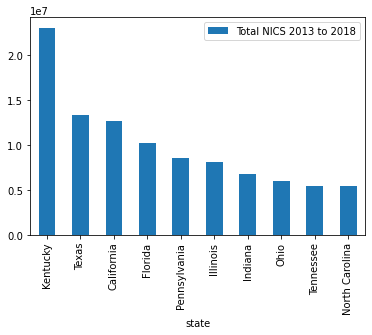

In [10]:
state_nics_ten.plot.bar()

<AxesSubplot:ylabel='state'>

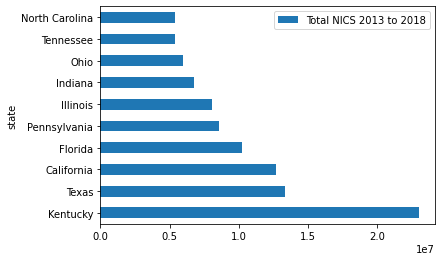

In [11]:
state_nics_ten.plot.barh()

### Clean New GVA, Add US Populations, and Visualize Top 10 States ###

In [12]:
us_pop = pd.read_excel("data/annual_us_pop_2010_2019.xlsx")
us_pop.head(10)

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,.Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,.Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,.Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,.Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,.California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
5,.Colorado,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736
6,.Connecticut,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287
7,.Delaware,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764
8,.District of Columbia,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749
9,.Florida,18845537,19053237,19297822,19545621,19845911,20209042,20613477,20963613,21244317,21477737


In [13]:
us_pop_copy = us_pop.copy()
us_pop_copy['State'] = us_pop_copy['State'].str.lstrip('.') #The str.lstrip() function is used to remove leading and trailing characters.
us_pop_copy.columns = us_pop_copy.columns.map(str) #Convert Column Name from int to string in pandas
us_pop_copy = pd.melt(us_pop_copy, id_vars=['State'], value_vars=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], ignore_index=False)
us_pop_copy = us_pop_copy.rename(columns ={'variable':'Year', 'value':'Population'})
us_pop_copy['Year'] = pd.to_datetime(us_pop_copy['Year']) 
us_pop_copy['Year'] = us_pop_copy['Year'].dt.year
us_pop_copy.head(20)

,State,Year,Population
0,Alabama,2010,4785437
1,Alaska,2010,713910
2,Arizona,2010,6407172
3,Arkansas,2010,2921964
4,California,2010,37319502
5,Colorado,2010,5047349
6,Connecticut,2010,3579114
7,Delaware,2010,899593
8,District of Columbia,2010,605226
9,Florida,2010,18845537


In [14]:
us_pop_copy.dtypes

State         object
Year           int64
Population     int64
dtype: object

In [15]:
gva_copy = gva_final.copy()
gva_copy['date']=pd.to_datetime(gva_copy['date'])
gva_copy['Year'] = gva_copy['date'].dt.to_period(freq ="Y")
gva_copy['Year'] = gva_copy['Year'].astype(str) # cast the period type to string then to datetime. Just could not go straight from period to datetime.
gva_copy['Year']= pd.to_datetime(gva_copy['Year'])
gva_copy['Year'] = gva_copy['Year'].dt.year
gva_copy = gva_copy.drop(['Unnamed: 0','date'], axis=1)
gva_copy = gva_copy.rename(columns ={'state':'State'})
gva_copy.head()

,State,city,n_killed,n_injured,incident_id,Year
0,Pennsylvania,Mckeesport,0,4,461105,2013
1,California,Hawthorne,1,3,460726,2013
2,Ohio,Lorain,1,3,478855,2013
3,Colorado,Aurora,4,0,478925,2013
4,North Carolina,Greensboro,2,2,478959,2013


In [16]:
gva_copy.dtypes

State          object
city           object
n_killed        int64
n_injured       int64
incident_id     int64
Year            int64
dtype: object

i think total amounts of incidents of gun violence would be the sum of the deaths 
and injuries for each incident listed then that summed vs the count of the incident id entries because each entry contains multiple “incidents” if that makes sense

In [17]:
us_pop_gva = gva_copy.merge(us_pop_copy, how='outer', left_on=['State','Year'], right_on=['State','Year']) #join two Pandas DataFrames on multiple columns
us_pop_gva['total_population_weighted_by_state'] = us_pop_gva.apply(lambda x: 100000/x['Population'], axis = 1)
us_pop_gva['Total Injuries'] = us_pop_gva['n_killed'] + us_pop_gva['n_injured']
us_pop_gva['Total Injuries x 100k Weighted Population'] = us_pop_gva['Total Injuries'] * us_pop_gva['total_population_weighted_by_state']
us_pop_gva.head()

,State,city,n_killed,n_injured,incident_id,Year,Population,total_population_weighted_by_state,Total Injuries,Total Injuries x 100k Weighted Population
0,Pennsylvania,Mckeesport,0.0,4.0,461105.0,2013,12776309.0,0.007827,4.0,0.031308
1,Pennsylvania,Philadelphia,1.0,3.0,484268.0,2013,12776309.0,0.007827,4.0,0.031308
2,Pennsylvania,Chester,1.0,3.0,485885.0,2013,12776309.0,0.007827,4.0,0.031308
3,Pennsylvania,Johnstown,0.0,4.0,486068.0,2013,12776309.0,0.007827,4.0,0.031308
4,Pennsylvania,Philadelphia,0.0,4.0,486121.0,2013,12776309.0,0.007827,4.0,0.031308


In [40]:
us_pop_gva_tablau = us_pop_gva.groupby(['State','Year'])[['n_killed','n_injured','Total Injuries']].sum()
us_pop_gva_tablau.to_csv(r'/Users/Joejoe/CS/DS4A/Project Docs/Team 97 Code/Team97_DS4A/data/2019 to 2020 us pop and gva totals.csv')

In [18]:
us_pop_gva.dtypes

State                                         object
city                                          object
n_killed                                     float64
n_injured                                    float64
incident_id                                  float64
Year                                           int64
Population                                   float64
total_population_weighted_by_state           float64
Total Injuries                               float64
Total Injuries x 100k Weighted Population    float64
dtype: object

In [19]:
total_injuries_weighted = us_pop_gva.groupby(['State','Year'])['Total Injuries x 100k Weighted Population'].sum()
df_total_injuries_weighted = pd.DataFrame(total_injuries_weighted)
df_total_injuries_weighted.columns = ['Total Injuries In State Per 100k']
df_total_injuries_reindexed= df_total_injuries_weighted.reset_index(level ='Year')
pivot_total_injuries_weighted= pd.pivot_table(data = df_total_injuries_reindexed, index ="State", columns ='Year', values = 'Total Injuries In State Per 100k' )
pivot_total_injuries_weighted

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.248443,18.918588,19.516329,25.680962,28.720977,25.901854,25.514028,0.0
Alaska,0.0,0.0,0.0,0.000000,10.593753,20.881413,25.760126,18.791402,16.051386,13.669699,0.0
Arizona,0.0,0.0,0.0,0.361840,6.567205,5.973929,8.226395,8.333324,8.046914,8.339382,0.0
Arkansas,0.0,0.0,0.0,0.000000,13.479850,13.431617,18.094142,21.756912,18.406948,18.622813,0.0
California,0.0,0.0,0.0,0.483524,7.583496,7.248566,8.070546,8.577563,7.883616,8.159500,0.0
Colorado,0.0,0.0,0.0,0.246724,5.850357,8.402709,9.134868,8.891843,9.277339,9.272868,0.0
Connecticut,0.0,0.0,0.0,0.417265,7.817447,11.736428,11.905624,10.690407,9.575755,11.976595,0.0
Delaware,0.0,0.0,0.0,1.407572,24.772463,28.047749,24.132673,31.040224,16.882812,20.846940,0.0
District of Columbia,0.0,0.0,0.0,6.763186,58.883212,69.440332,64.886303,63.317916,69.275473,76.656148,0.0


Text(0.5, 1.0, 'Total Gun Related Injuries per 100,000 from 2014-2019')

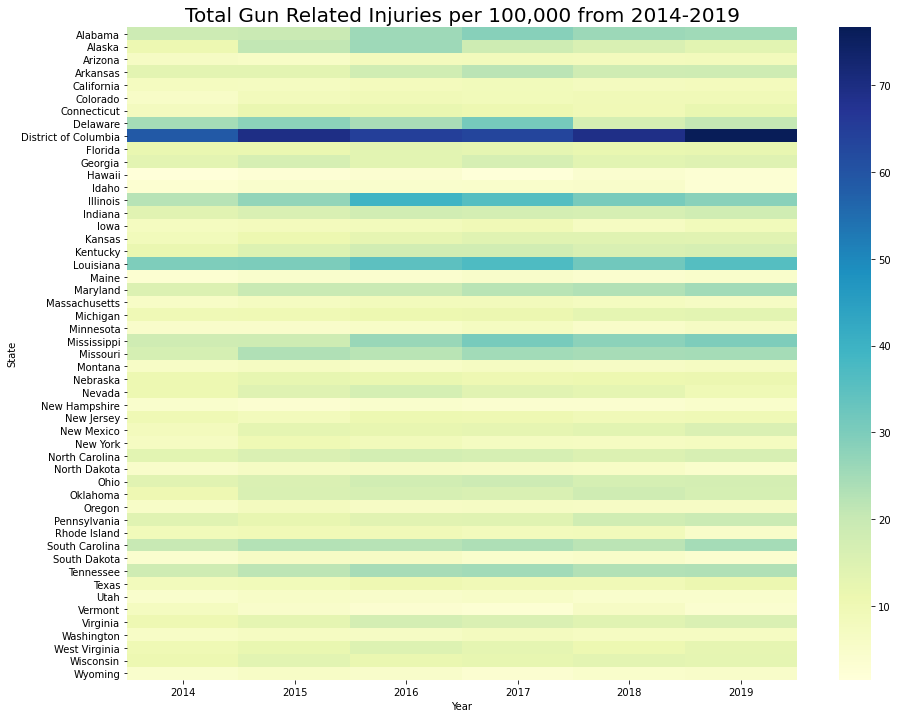

In [20]:
complete_years = pivot_total_injuries_weighted.drop([2010,2011,2012,2013,2020], axis = 1)
plt.figure(figsize=(15, 12)) # We can set the size using matplotlib
sns.heatmap(complete_years, cmap="YlGnBu") # cmap defines the color palette
plt.title("Total Gun Related Injuries per 100,000 from 2014-2019", fontsize  = 20)

### Top 10 Injury and Death States ###

In [21]:
us_pop_gva.head()

,State,city,n_killed,n_injured,incident_id,Year,Population,total_population_weighted_by_state,Total Injuries,Total Injuries x 100k Weighted Population
0,Pennsylvania,Mckeesport,0.0,4.0,461105.0,2013,12776309.0,0.007827,4.0,0.031308
1,Pennsylvania,Philadelphia,1.0,3.0,484268.0,2013,12776309.0,0.007827,4.0,0.031308
2,Pennsylvania,Chester,1.0,3.0,485885.0,2013,12776309.0,0.007827,4.0,0.031308
3,Pennsylvania,Johnstown,0.0,4.0,486068.0,2013,12776309.0,0.007827,4.0,0.031308
4,Pennsylvania,Philadelphia,0.0,4.0,486121.0,2013,12776309.0,0.007827,4.0,0.031308


In [22]:
clean_us_pop_gva = us_pop_gva.copy()
clean_us_pop_gva = clean_us_pop_gva[clean_us_pop_gva.Year != 2010 & 2011 & 2012 & 2013 & 2020]
clean_us_pop_gva['Injuries/100k Persons, 2014 to 2019'] = clean_us_pop_gva['n_injured'] * clean_us_pop_gva['total_population_weighted_by_state']
weighted_state_injuries_total = clean_us_pop_gva.groupby(['State'])[['Injuries/100k Persons, 2014 to 2019']].sum().sort_values(by='Injuries/100k Persons, 2014 to 2019', ascending=False)
weighted_state_injuries_total.head(10)
top_ten_injury_states = weighted_state_injuries_total.head(10)
top_ten_injury_states

,"Injuries/100k Persons, 2014 to 2019"
State,
District of Columbia,305.353794
Illinois,147.359829
Louisiana,134.625142
Delaware,115.308135
Tennessee,95.743517
Mississippi,93.336866
Alabama,88.968577
South Carolina,88.818185
Missouri,85.364570


<AxesSubplot:ylabel='State'>

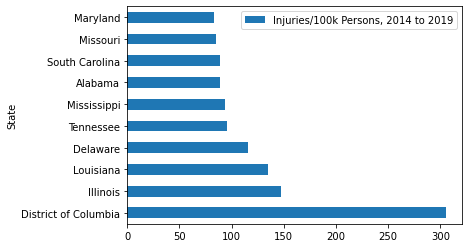

In [23]:
top_ten_injury_states.plot.barh()

In [24]:
clean_us_pop_gva['Deaths/100k Persons, 2014 to 2019'] = clean_us_pop_gva['n_killed'] * clean_us_pop_gva['total_population_weighted_by_state']
weighted_state_deaths_total = clean_us_pop_gva.groupby(['State'])[['Deaths/100k Persons, 2014 to 2019']].sum().sort_values(by='Deaths/100k Persons, 2014 to 2019', ascending=False)
weighted_state_deaths_total.head(10)
top_ten_death_states = weighted_state_deaths_total.head(10)
top_ten_death_states

,"Deaths/100k Persons, 2014 to 2019"
State,
District of Columbia,103.868776
Louisiana,66.292235
Mississippi,58.865759
Alabama,55.532604
Missouri,52.342464
Alaska,48.946669
South Carolina,47.509600
Maryland,42.344753
Tennessee,40.995678


<AxesSubplot:ylabel='State'>

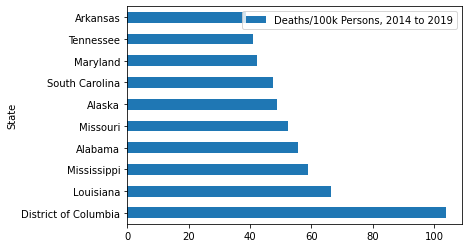

In [25]:
top_ten_death_states.plot.barh()

In [26]:
top_tens_merged = top_ten_death_states.merge(top_ten_injury_states, how='inner', left_on=['State'], right_on=['State'])
top_tens_merged

,"Deaths/100k Persons, 2014 to 2019","Injuries/100k Persons, 2014 to 2019"
State,,
District of Columbia,103.868776,305.353794
Louisiana,66.292235,134.625142
Mississippi,58.865759,93.336866
Alabama,55.532604,88.968577
Missouri,52.342464,85.364570
South Carolina,47.509600,88.818185
Maryland,42.344753,82.902749
Tennessee,40.995678,95.743517


### Mapping Incients of Top 10 Injury and Death States ###

In [27]:
og_gva_copy = og_gva.copy()
og_gva_copy = og_gva_copy.drop(columns=['incident_url','source_url',
                                       'incident_url_fields_missing',
                                       'congressional_district','notes',
                                       'participant_age_group','participant_name','sources',
                                       'state_house_district','state_senate_district'])
og_gva_copy['Total Injuries'] = og_gva_copy['n_killed'] + og_gva_copy['n_injured']
og_gva_copy.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,participant_age,participant_gender,participant_relationship,participant_status,participant_type,Total Injuries
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,0::20,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,0::20,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4


In [28]:
dc_only = og_gva_copy[og_gva_copy['state'] == 'District of Columbia']
dc_nonan = dc_only.dropna(axis =0, subset = ['latitude','longitude'])
dc_only_clean = dc_nonan.reset_index(drop = True)
dc_only_clean.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,participant_age,participant_gender,participant_relationship,participant_status,participant_type,Total Injuries
0,479554,2013-01-26,District of Columbia,Washington,2403 Benning Road Northeast,0,5,0::Unknown,0::Handgun,Shot - Wounded/Injured||Mass Shooting (4+ vict...,38.8978,NaN,-76.9717,1.0,NaN,0::Female||1::Female||2::Male||3::Male||4::Mal...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,5
1,482771,2013-03-11,District of Columbia,Washington,1200 North Capitol Street,0,13,0::Unknown||1::Unknown||2::Unknown||3::Unknown,0::9mm||1::9mm||2::40 SW||3::40 SW,Shot - Wounded/Injured||Drive-by (car to stree...,38.9062,Tyler House,-77.0099,4.0,0::19||1::19||2::17||15::21,0::Male||1::Male||2::Male||3::Male||4::Male||5...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,13
2,490979,2013-07-13,District of Columbia,Washington,2700 block of Stanton Road,0,4,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,38.8583,NaN,-76.9883,NaN,NaN,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4
3,479757,2013-09-12,District of Columbia,Washington,First Street and Pierce Street NW,1,3,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",38.9047,NaN,-77.0122,NaN,0::32,0::Male||1::Male||2::Male||3::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim,4
4,480366,2013-09-16,District of Columbia,Washington Navy Yard,1336 Isaac Hull Ave,11,3,0::Unknown||1::Unknown,0::9mm||1::Shotgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",38.8730,NAVSEA Building 197,-76.9977,2.0,0::59||1::53||2::51||3::53||4::62||5::73||6::5...,0::Male||1::Male||2::Male||3::Female||4::Femal...,15::Co-worker,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,14


In [29]:
dc_zips = zip(dc_only_clean['latitude'], dc_only_clean['longitude'], dc_only_clean['Total Injuries'])
dc_zips_list = list(dc_zips)

In [30]:
folium_hmap = folium.Map(location=[38.89511, -77.03637], zoom_start=13, tiles="OpenStreetMap")
hm_layer = HeatMap(dc_zips_list,min_opacity=0.2,radius=8,blur=6)
#These are parameters that we tweak manually to adjust color, See folium docs for more information
folium_hmap.add_child(hm_layer)
folium_hmap

In [31]:
nics_gva_final_states = state_nics_ten.join(top_tens_merged, how='inner')
nics_gva_final_states

,Total NICS 2013 to 2018,"Deaths/100k Persons, 2014 to 2019","Injuries/100k Persons, 2014 to 2019"
Tennessee,5419917.0,40.995678,95.743517


In [32]:
gva_nics_final_states = top_tens_merged.join(state_nics, how='inner')
gva_nics_final_states

,"Deaths/100k Persons, 2014 to 2019","Injuries/100k Persons, 2014 to 2019",Total NICS 2013 to 2018
District of Columbia,103.868776,305.353794,24281.0
Louisiana,66.292235,134.625142,2775373.0
Mississippi,58.865759,93.336866,2073212.0
Alabama,55.532604,88.968577,5247702.0
Missouri,52.342464,85.364570,4511536.0
South Carolina,47.509600,88.818185,2867616.0
Maryland,42.344753,82.902749,1418553.0
Tennessee,40.995678,95.743517,5419917.0


In [33]:
gva_nics_final = og_gva_copy[og_gva_copy['state'].isin(['District of Columbia','Louisiana','Mississippi','Alabama','Missouri','South Carolina','Maryland','Tennessee'])]
gva_nics_final_nonan = gva_nics_final.dropna(axis =0, subset = ['latitude','longitude'])
gva_nics_final_clean = gva_nics_final_nonan.reset_index(drop = True)
gva_nics_final_clean.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,participant_age,participant_gender,participant_relationship,participant_status,participant_type,Total Injuries
0,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,NaN,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,29.9435,NaN,-90.0836,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,5
1,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.2899,NaN,-76.6412,NaN,0::15,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,7
2,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,0::Unknown,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",35.0221,NaN,-85.2697,1.0,0::19,0::Male||1::Male||2::Male||3::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4
3,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,0::Unknown,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",38.7067,NaN,-90.2494,1.0,0::28,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4
4,479561,2013-01-26,Louisiana,Charenton,1000 block of Flat Town Road,2,3,0::Unknown,0::Shotgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",29.8816,NaN,-91.5251,1.0,3::78||4::48,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,0::Killed||1::Injured||2::Injured||3::Killed||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,5


In [35]:
gva_nics_final_zips = zip(gva_nics_final_clean['latitude'], gva_nics_final_clean['longitude'], gva_nics_final_clean['Total Injuries'])
gva_nics_final_zips_list = list(gva_nics_final_zips)
gva_nics_final_zips_hmap = folium.Map(location=[35,-85.665], zoom_start=7, tiles="OpenStreetMap")
new_layer = HeatMap(gva_nics_final_zips_list,min_opacity=0.2,radius=8,blur=6)
#These are parameters that we tweak manually to adjust color, See folium docs for more information
gva_nics_final_zips_hmap.add_child(new_layer)
gva_nics_final_zips_hmap